In [60]:
pip install radar

  Created wheel for radar: filename=radar-0.3-py3-none-any.whl size=5007 sha256=89679d968e0b4959768c505dac6fa0aab4db51aef804331dafdddd7eaef5ef9b
  Stored in directory: /Users/nathaniel/Library/Caches/pip/wheels/4d/41/00/31e81df39a2a873b7a8a9778ba538cc483fbdfc2a0d72c0f16
Successfully built radar
You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Aquisition / Cleaing

In [27]:
# imports data
acc = pd.read_csv('data/Traffic_Accidents.csv')

# converts Date and Time to Datetime
for i in acc.index:
    dt = acc.loc[i,'Date and Time']
    acc.loc[i,'Date and Time'] = datetime.strptime(dt, "%B %d, %Y %I:%M %p")

acc.rename(columns={'Date and Time': 'Datetime'}, inplace=True)

acc.head(3)

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident Number,Datetime,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20200606233,2020-09-21 18:37:00,1.0,0,0,NaN,False,311344.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,TREE;Ran Off Road-Left,LEWIS ST & FAIN ST,NASHVILLE,TN,37210.0,8207.0,HERMIT,36.1518,-86.7580,POINT (-86.758 36.1518)
1,20200603908,2020-09-20 00:00:00,1.0,0,0,True,True,409155.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,MAIL BOX,RICHMOND HILL DR & CARTERWOOD DR,NASHVILLE,TN,37207.0,2005.0,MADISO,36.2323,-86.7733,POINT (-86.7733 36.2323)
2,20200604395,2020-09-20 19:20:00,1.0,1,0,NaN,False,330419.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,OTHER ANIMAL,SHUTE LN & SAUNDERSVILLE RD,OLD HICKORY,TN,37138.0,9717.0,HERMIT,36.2267,-86.6032,POINT (-86.6032 36.2267)


In [29]:
# Gets Preds schedule information
preds_21 = pd.DataFrame(columns=['Date', 'Time', 'Opponent'])
for i in range(0,12):
    try:
        link = 'https://www.gamedaycalendar.com/schedules/nhl/nas/2021/' + str(i)
        df = pd.read_html(link)[1]
        preds_21 = pd.concat([preds_21, df], 0)
        
    except:
        pass

preds_21['Datetime'] = preds_21['Date'] + ', 2021 ' + preds_21['Time']

preds_20 = pd.DataFrame(columns=['Date', 'Time', 'Opponent'])
for i in range(0,12):
    try:
        link = 'https://www.gamedaycalendar.com/schedules/nhl/nas/2020/' + str(i)
        df = pd.read_html(link)[1]
        preds_20 = pd.concat([preds_20, df], 0)
        
    except:
        pass

preds_20['Datetime'] = preds_20['Date'] + ', 2020 ' + preds_20['Time']

preds_19 = pd.DataFrame(columns=['Date', 'Time', 'Opponent'])
for i in range(0,12):
    try:
        link = 'https://www.gamedaycalendar.com/schedules/nhl/nas/2019/' + str(i)
        df = pd.read_html(link)[1]
        preds_19 = pd.concat([preds_19, df], 0)
        
    except:
        pass

preds_19['Datetime'] = preds_19['Date'] + ', 2019 ' + preds_19['Time']

preds = pd.concat([preds_19, preds_20, preds_21], axis=0)

preds.reset_index(drop=True, inplace=True)

for i in preds.index:
    try:
        if preds.loc[i,'Opponent'][0:2] != 'vs':
            preds.drop(i, axis=0, inplace=True)
    except:
        pass

preds.reset_index(drop=True, inplace=True)
preds.drop(['Date', 'Time'], axis=1, inplace=True)

for i in preds.index:
    try:
        dt = preds.loc[i,'Datetime']
        preds.loc[i,'Datetime'] = datetime.strptime(dt, "%a, %b %d, %Y %H:%M %p")
    except:
        preds.drop(i, axis=0, inplace=True)

preds.head(3)

/var/folders/wk/51k2h5_x7s9ddqb9bxcf31k00000gn/T/ipykernel_91935/3498946113.py:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  preds_21 = pd.concat([preds_21, df], 0)
/var/folders/wk/51k2h5_x7s9ddqb9bxcf31k00000gn/T/ipykernel_91935/3498946113.py:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  preds_20 = pd.concat([preds_20, df], 0)
/var/folders/wk/51k2h5_x7s9ddqb9bxcf31k00000gn/T/ipykernel_91935/3498946113.py:31: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  preds_19 = pd.concat([preds_19, df], 0)


,Opponent,Datetime
0,vs Dallas Stars,2019-01-01 12:00:00
1,vs Boston Bruins,2019-01-07 07:00:00
2,vs Anaheim Ducks,2019-01-16 07:00:00


In [16]:
# Gets Titans schedule information
titans_21 = pd.DataFrame(columns=['Date', 'Time', 'Opponent'])

link = 'https://www.gamedaycalendar.com/schedules/nfl/ten/2021'
titans_21 = pd.read_html(link)[1]
titans_21['Datetime'] = titans_21['Date'] + ', 2021 ' + titans_21['Time']

titans_20 = pd.DataFrame(columns=['Date', 'Time', 'Opponent'])

link = 'https://www.gamedaycalendar.com/schedules/nfl/ten/2020'
titans_20 = pd.read_html(link)[1]
titans_20['Datetime'] = titans_20['Date'] + ', 2020 ' + titans_20['Time']

titans_19 = pd.DataFrame(columns=['Date', 'Time', 'Opponent'])

link = 'https://www.gamedaycalendar.com/schedules/nfl/ten/2019'
titans_19 = pd.read_html(link)[1]
titans_19['Datetime'] = titans_19['Date'] + ', 2019 ' + titans_19['Time']

titans = pd.concat([titans_19, titans_20, titans_21], axis=0)

titans.reset_index(drop=True, inplace=True)

for i in titans.index:
    try:
        if titans.loc[i,'Opponent'][0:2] != 'vs':
            titans.drop(i, axis=0, inplace=True)
    except:
        pass

titans.reset_index(drop=True, inplace=True)
titans.drop(['Date', 'Time', 'Week'], axis=1, inplace=True)

for i in titans.index:
    dt = titans.loc[i,'Datetime']
    titans.loc[i,'Datetime'] = datetime.strptime(dt, "%a, %b %d, %Y %H:%M %p")

titans.head(3)

,Opponent,Datetime
0,vs New England Patriots,2019-08-17 06:00:00
1,vs Pittsburgh Steelers,2019-08-25 07:00:00
2,vs Indianapolis Colts,2019-09-15 12:00:00


In [28]:
# Gets NashSC schedule information
nash_sc = pd.read_csv('data/nashsc 2019-2021.csv')

nash_sc['Datetime'] = nash_sc['Date'] + nash_sc['Time']
nash_sc.drop(['Date', 'Time'], axis=1, inplace=True)

for i in nash_sc.index:
    dt = nash_sc.loc[i,'Datetime']
    nash_sc.loc[i,'Datetime'] = datetime.strptime(dt,"%B %d %Y %H:%M %p")

nash_sc.head(3)

,Datetime
0,2020-02-29 07:00:00
1,2020-03-21 01:00:00
2,2020-04-03 08:00:00


### Approach

I think that the best baseline will actually be a model that takes the month, day of the week, and start time, and predicts the number of injuries that will happen, we then compare the observed injuries to the modeled injuries, and viola.

The plan will be to use a regression model made using gradient boosting to create the baseline. To do this, I will need to get month, weekday, and hour data from each incident. I can then use the group by an mean functions to get a data set continaing every possibility, and then use that to train the model...

In [30]:
type(acc_data.loc[0,'Datetime'])

str

In [31]:
# limits data to 2021
print(acc.shape[0])

acc_data = acc.copy()

acc_data.drop(acc_data[acc_data['Datetime'] > datetime(2021,12,31)].index, axis=0, inplace=True)
acc_data.drop(acc_data[acc_data['Datetime'] < datetime(2019,1,1)].index, axis=0, inplace=True)

print(acc_data.shape[0])
acc_data.head()

214962
74362


,Accident Number,Datetime,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20200606233,2020-09-21 18:37:00,1.0,0,0,NaN,False,311344.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,TREE;Ran Off Road-Left,LEWIS ST & FAIN ST,NASHVILLE,TN,37210.0,8207.0,HERMIT,36.1518,-86.7580,POINT (-86.758 36.1518)
1,20200603908,2020-09-20 00:00:00,1.0,0,0,True,True,409155.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,MAIL BOX,RICHMOND HILL DR & CARTERWOOD DR,NASHVILLE,TN,37207.0,2005.0,MADISO,36.2323,-86.7733,POINT (-86.7733 36.2323)
2,20200604395,2020-09-20 19:20:00,1.0,1,0,NaN,False,330419.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,OTHER ANIMAL,SHUTE LN & SAUNDERSVILLE RD,OLD HICKORY,TN,37138.0,9717.0,HERMIT,36.2267,-86.6032,POINT (-86.6032 36.2267)
3,20200605021,2020-09-21 05:58:00,2.0,0,0,NaN,False,256569.0,5.0,SIDESWIPE - SAME DIRECTION,...,MOTOR VEHICLE IN TRANSPORT,MURFREESBORO PKE & WILHAGAN RD,NASHVILLE,TN,37217.0,8801.0,SOUTH,36.1325,-86.7193,POINT (-86.7193 36.1325)
4,20200605988,2020-09-21 15:27:00,2.0,0,0,NaN,False,179606.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,NOLENSVILLE PKE & WOODYCREST AV,NASHVILLE,TN,37211.0,8041.0,MIDTOW,36.1312,-86.7562,POINT (-86.7562 36.1312)


In [32]:
# Graphs number of injuries by month, and day of the week
for i in acc_data.index:
    acc_data.loc[i,'Year'] = acc_data.loc[i,'Datetime'].year
    acc_data.loc[i,'Month'] = acc_data.loc[i,'Datetime'].month
    acc_data.loc[i,'Weekday'] = acc_data.loc[i,'Datetime'].weekday()
    acc_data.loc[i,'Hour'] = acc_data.loc[i,'Datetime'].hour

acc_data.head()

,Accident Number,Datetime,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,Year,Month,Weekday,Hour
0,20200606233,2020-09-21 18:37:00,1.0,0,0,NaN,False,311344.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,37210.0,8207.0,HERMIT,36.1518,-86.7580,POINT (-86.758 36.1518),2020.0,9.0,0.0,18.0
1,20200603908,2020-09-20 00:00:00,1.0,0,0,True,True,409155.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,37207.0,2005.0,MADISO,36.2323,-86.7733,POINT (-86.7733 36.2323),2020.0,9.0,6.0,0.0
2,20200604395,2020-09-20 19:20:00,1.0,1,0,NaN,False,330419.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,37138.0,9717.0,HERMIT,36.2267,-86.6032,POINT (-86.6032 36.2267),2020.0,9.0,6.0,19.0
3,20200605021,2020-09-21 05:58:00,2.0,0,0,NaN,False,256569.0,5.0,SIDESWIPE - SAME DIRECTION,...,37217.0,8801.0,SOUTH,36.1325,-86.7193,POINT (-86.7193 36.1325),2020.0,9.0,0.0,5.0
4,20200605988,2020-09-21 15:27:00,2.0,0,0,NaN,False,179606.0,11.0,Front to Rear,...,37211.0,8041.0,MIDTOW,36.1312,-86.7562,POINT (-86.7562 36.1312),2020.0,9.0,0.0,15.0


Text(0.5, 1.0, 'Number of Injuires by Hour')

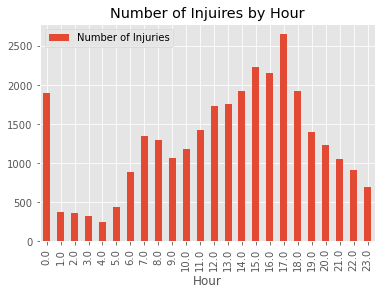

In [33]:
acc_data[['Number of Injuries','Hour']].groupby('Hour').sum().sort_index().plot(kind='bar')

plt.title('Number of Injuires by Hour')

Text(0.5, 1.0, 'Number of Injuires by Weekday')

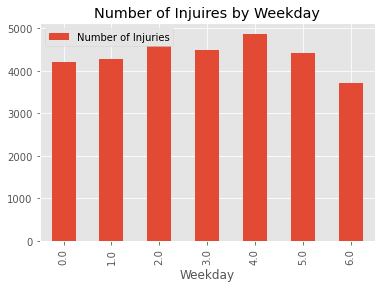

In [34]:
acc_data[['Number of Injuries','Weekday']].groupby('Weekday').sum().sort_index().plot(kind='bar')

plt.title('Number of Injuires by Weekday')

Text(0.5, 1.0, 'Number of Injuires by Month')

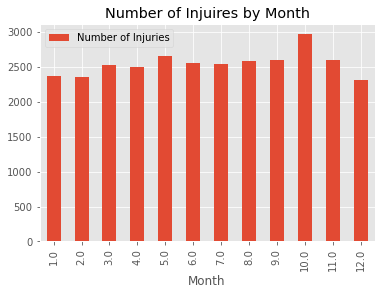

In [35]:
acc_data[['Number of Injuries','Month']].groupby('Month').sum().sort_index().plot(kind='bar')

plt.title('Number of Injuires by Month')

## Model Creation

In [36]:
# Creates a model
data = acc_data.copy()[['Number of Injuries', 'Year', 'Month', 'Weekday', 'Hour']]
data = data.groupby([ 'Year', 'Month', 'Weekday', 'Hour']).sum()
data.reset_index(inplace=True)

data.rename(columns={'Number of Injuries': 'Inj'}, inplace=True)

data['Year'] = data['Year'].astype('int').astype('str')
data['Month'] = data['Month'].astype('int').astype('str')
data['Weekday'] = data['Weekday'].astype('int').astype('str')
data['Hour'] = data['Hour'].astype('int').astype('str')

data = pd.concat([data, pd.get_dummies( data[['Year', 'Month', 'Weekday', 'Hour']] )] , axis=1)

data.columns

Index(['Year', 'Month', 'Weekday', 'Hour', 'Inj', 'Year_2019', 'Year_2020',
       'Year_2021', 'Month_1', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6', 'Hour_0', 'Hour_1', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_2', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

factors = ['Year_2019', 'Year_2020', 'Year_2021', 'Month_1', 'Month_10', 'Month_11','Month_12', 'Month_2', 'Month_3', 
           'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 
           'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 
           'Weekday_5', 'Weekday_6', 'Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 
           'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 
           'Hour_18', 'Hour_19', 'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 
           'Hour_23', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9']

x_data = np.asarray(data[factors])
y_data = np.asarray(data['Inj'])

x_data = np.nan_to_num(x_data)
y_data = np.nan_to_num(y_data)

y_data = y_data.astype('float32')

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

def auto_tune_gb(init_vals):
    params = {}
    params['subsample'] = [.05, .1, .25, .2, .25, .3]
    params['max_depth'] = [2, 3, 4]
    params['learning_rate'] = [0.01, 0.005, 0.002]
    params['n_estimators'] = [500, 700, 1000]
    params['loss'] = ['ls', 'lad', 'huber', 'quantile']

    best_vals = init_vals
    print('Start Values', best_vals)

    for i, param in enumerate(params.keys()):
        param_list = params[param]
        value_scores = pd.DataFrame({'value':param_list})

        for j, values in enumerate(param_list):
            j_vals = best_vals
            j_vals[i] = values
            
            model = GradientBoostingRegressor(subsample = j_vals[0],
                                              max_depth = j_vals[1],
                                              learning_rate = j_vals[2],
                                              n_estimators = j_vals[3],
                                              loss = j_vals[4],
                                              random_state=42)

            scores = cross_val_score(model, x_data, y_data, cv=8, scoring='r2').mean()
            value_scores.loc[j,'score'] = scores

        max_score = value_scores['score'].max()
        k = value_scores[value_scores['score'] == max_score].index
        best_val = value_scores.loc[k,'value'].to_list()[0]

        best_vals[i] = best_val
        print('Updated Values', best_vals, 'Score:', round(max_score, 3))

    return best_vals

init_list = [0.05, 3, 0.005, 1000, 'lad']

#for i in range(1,4):
    #print('Round:', i)
    #init_list = auto_tune_gb(init_list)



In [41]:
from sklearn.neural_network import MLPRegressor

def auto_tune_nn(init_vals):
    params = {}
    params['activation'] = ['identity', 'logistic', 'tanh', 'relu']
    params['solver'] = ['lbfgs', 'sgd', 'adam']
    params['alpha'] = [1, 0.1, 0.01, 0.001]
    params['hidden_layer_sizes'] = [2, 4, 6, 8, (6,3), (4,2)]
    params['max_iter'] = [5000]

    best_vals = init_vals

    print('Start Values', best_vals)

    for i, param in enumerate(params.keys()):
        param_list = params[param]
        value_scores = pd.DataFrame({'value':param_list})

        for j, values in enumerate(param_list):
            j_vals = best_vals
            j_vals[i] = values
            
            model = MLPRegressor(activation = j_vals[0], 
                                 solver = j_vals[1], 
                                 alpha = j_vals[2], 
                                 hidden_layer_sizes = j_vals[3], 
                                 max_iter = j_vals[4],
                                 random_state = 42)

            scores = cross_val_score(model, x_data, y_data, cv=8, scoring='r2').mean()
            value_scores.loc[j,'score'] = scores

        max_score = value_scores['score'].max()
        k = value_scores[value_scores['score'] == max_score].index
        best_val = value_scores.loc[k,'value'].to_list()[0]

        best_vals[i] = best_val
        print('Updated Values', best_vals, 'Score:', round(max_score, 3))

    return best_vals

init_list = ['identity', 'sgd', 0.01, 2, 5000]

#for i in range(1,4):
    #print('Round:', i)
    #init_list = auto_tune_nn(init_list)

Observations:
* The best GB score was 0.219 using the values [0.25, 4, 0.01, 700, 'huber']
* The best NN score was 0.227 using the values ['identity', 'sgd', 1.0, 2, 1000]

Both r2 scores are relatively low, but what really matters to me is whether or not they do a good job reflecting the aggregate.


In [42]:
# Compares the models to the real data graphicaly
model = GradientBoostingRegressor(subsample = 0.25,
                                  max_depth = 4,
                                  learning_rate = 0.01,
                                  n_estimators = 700,
                                  loss = 'huber',
                                  random_state=42)

model.fit(x_data, y_data)
data['GB_Preds'] = model.predict(x_data)

model = MLPRegressor(activation = 'identity', 
                     solver = 'sgd', 
                     alpha = 1, 
                     hidden_layer_sizes = 2, 
                     max_iter = 1000,
                     random_state = 42) 

model.fit(x_data, y_data)
data['NN_Preds'] = model.predict(x_data)

data.head()

,Year,Month,Weekday,Hour,Inj,Year_2019,Year_2020,Year_2021,Month_1,Month_10,...,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,GB_Preds,NN_Preds
0,2019,1,0,0,8,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6.122028,8.578375
1,2019,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.754941,2.718980
2,2019,1,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.773401,2.736910
3,2019,1,0,3,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1.543725,2.507128
4,2019,1,0,4,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1.156253,2.202084


Text(0.5, 1.0, 'Number of Injuires per Hour by Month')

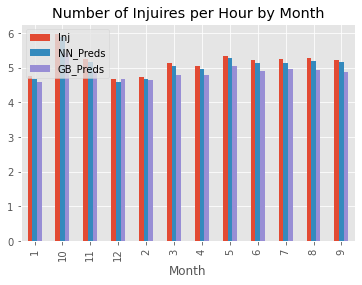

In [43]:
data[['Inj', 'NN_Preds', 'GB_Preds', 'Month']].groupby('Month').mean().sort_index().plot(kind='bar')

plt.title('Number of Injuires per Hour by Month')

Text(0.5, 1.0, 'Number of Injuires by Weekday')

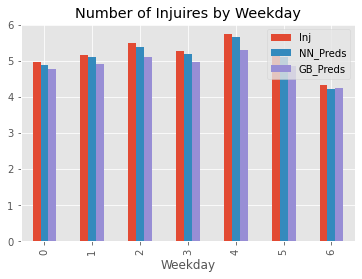

In [44]:
data[['Inj', 'NN_Preds', 'GB_Preds', 'Weekday']].groupby('Weekday').mean().sort_index().plot(kind='bar')

plt.title('Number of Injuires by Weekday')

Text(0.5, 1.0, 'Number of Injuires by Hour')

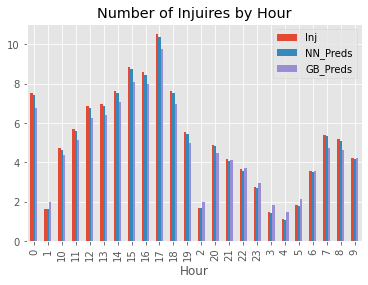

In [45]:
data[['Inj', 'NN_Preds', 'GB_Preds', 'Hour']].groupby('Hour').mean().sort_index().plot(kind='bar')

plt.title('Number of Injuires by Hour')

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual v. Predicted Values')

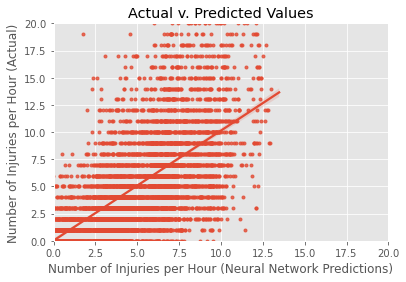

In [46]:
sns.regplot('NN_Preds', 'Inj', data, marker='.')

plt.xlabel('Number of Injuries per Hour (Neural Network Predictions)')
plt.ylabel('Number of Injuries per Hour (Actual)')

plt.xlim(0,20)
plt.ylim(0,20)

plt.title('Actual v. Predicted Values')

In [48]:
print('Injuries per Hour (Actual):', data['Inj'].sum() / (365*24*3)) 
print('Injuries per Hour (Neural Net):', round(data['NN_Preds'].sum()) / (365*24*3))

Injuries per Hour (Actual): 1.1627853881278538
Injuries per Hour (Neural Net): 1.144330289193303


The Neural Network model seems to do a good job of modeling traffic injuries that can help control for the variables we want to eliminate. On average, it is off by less than one injury every 100 hours.

## Evaluating Teams

In [49]:
# Casts certain data values as floats so they can be used
data['Year'] = data['Year'].astype('int')
data['Month'] = data['Month'].astype('int')
data['Weekday'] = data['Weekday'].astype('int')
data['Hour'] = data['Hour'].astype('int')

data.head()

,Year,Month,Weekday,Hour,Inj,Year_2019,Year_2020,Year_2021,Month_1,Month_10,...,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,GB_Preds,NN_Preds
0,2019,1,0,0,8,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6.122028,8.578375
1,2019,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.754941,2.718980
2,2019,1,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.773401,2.736910
3,2019,1,0,3,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1.543725,2.507128
4,2019,1,0,4,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1.156253,2.202084


In [83]:
# Function that finds accident info given a date time

def get_info(df, range_start, range_size):
    
    # Builds a training data set that excludes the information from the game hours
    train_data = data.copy()
    mask = df.copy()

    for i in mask.index:
        mask.loc[i,'Datetime'] = mask.loc[i,'Datetime'] + timedelta(hours = range_start)

    for k in range(range_size):
        for i in mask.index:
            year = mask.loc[i,'Datetime'].year
            month = mask.loc[i,'Datetime'].month
            weekday = mask.loc[i,'Datetime'].weekday()
            hour = mask.loc[i,'Datetime'].hour

            j = train_data[(train_data['Year'] == year) & (train_data['Month'] == month) & (train_data['Weekday'] == weekday) & (train_data['Hour'] == hour)].index
            train_data.drop(j, axis=0, inplace=True)
            
            mask.loc[i,'Datetime'] = mask.loc[i,'Datetime'] + timedelta(hours = 1)

    print('Training Sample:', train_data.shape[0])
    print('Test Sample:', mask.shape[0] * range_size)

    x_train_data = np.asarray(train_data[factors])
    y_train_data = np.asarray(train_data['Inj'])

    x_train_data = np.nan_to_num(x_train_data)
    y_train_data = np.nan_to_num(y_train_data)

    y_train_data = y_train_data.astype('float32')

    # Trains the model using that data set
    model = MLPRegressor(activation = 'identity', 
                            solver = 'sgd', 
                            alpha = 1, 
                            hidden_layer_sizes = 2, 
                            max_iter = 1000,
                            random_state = 42) 

    model.fit(x_train_data, y_train_data)
    
    # Uses that model to project values for the game hours
    for i in df.index:
        df.loc[i,'Datetime'] = df.loc[i,'Datetime'] + timedelta(hours = range_start)
    
    l = 0
    actual_cols = []
    model_cols = []

    for k in range(range_size):
        actual_cols.append('Actual_'+str(l + range_start))
        model_cols.append('Model_'+str(l + range_start))

        for i in df.index:
            year = df.loc[i,'Datetime'].year
            month = df.loc[i,'Datetime'].month
            weekday = df.loc[i,'Datetime'].weekday()
            hour = df.loc[i,'Datetime'].hour
            
            df.loc[i,'Year'] = year
            df.loc[i,'Month'] = month
            df.loc[i,'Weekday'] = weekday
            df.loc[i,'Hour'] = hour

            try:
                j = data[(data['Year'] == year) & (data['Month'] == month) & (data['Weekday'] == weekday) & (data['Hour'] == hour)].index
                inj = data.loc[j,'Inj'].to_list()[0]
                df.loc[i,actual_cols[l]] = inj

            except:
                df.loc[i,actual_cols[l]] = 0

        df['Year'] = df['Year'].astype('int').astype('str')
        df['Month'] = df['Month'].astype('int').astype('str')
        df['Weekday'] = df['Weekday'].astype('int').astype('str')
        df['Hour'] = df['Hour'].astype('int').astype('str')

        df = pd.concat([df, pd.get_dummies( df[['Year', 'Month', 'Weekday', 'Hour']] )] , axis=1)

        for facts in factors:
            if not facts in df.columns:
                df[facts] = 0

        x = np.asarray(df[factors])
        x = np.nan_to_num(x)

        df[model_cols[l]] = model.predict(x)

        df.drop(factors, axis=1, inplace=True)
        df.drop(['Year', 'Month', 'Weekday', 'Hour'], axis=1, inplace=True)

        for i in df.index:
            df.loc[i,'Datetime'] = df.loc[i,'Datetime'] + timedelta(hours = 1)

        l = l + 1

    for i in df.index:
        df.loc[i,'Datetime'] = df.loc[i,'Datetime'] + timedelta(hours = -(range_start + range_size))
        df.loc[i, 'Actual_Sum'] = df.loc[i, actual_cols].sum()
        df.loc[i, 'Model_Sum'] = df.loc[i, model_cols].sum()

    return df

preds_info = get_info(preds, 2, 1)

preds_info.head()


Training Sample: 5838
Test Sample: 110


,Opponent,Datetime,Actual_0,Actual_2,Model_2,Actual_Sum,Model_Sum
0,vs Dallas Stars,2019-01-01 16:00:00,5.0,4.0,8.862122,4.0,8.862122
1,vs Boston Bruins,2019-01-07 11:00:00,8.0,9.0,8.229325,9.0,8.229325
2,vs Anaheim Ducks,2019-01-16 11:00:00,14.0,9.0,8.687021,9.0,8.687021
3,vs Buffalo Sabres,2019-01-18 11:00:00,10.0,3.0,9.028282,3.0,9.028282
4,vs Toronto Maple Leafs,2019-01-27 11:00:00,0.0,16.0,7.614179,16.0,7.614179


Training Sample: 5679
Test Sample: 330
Actual Number of Injuries: 2872
Modeled Number of Injuries: 2523


Text(0.5, 1.0, 'Actual v. Modled Number of Traffic Injuries Durring + After Preds Games')

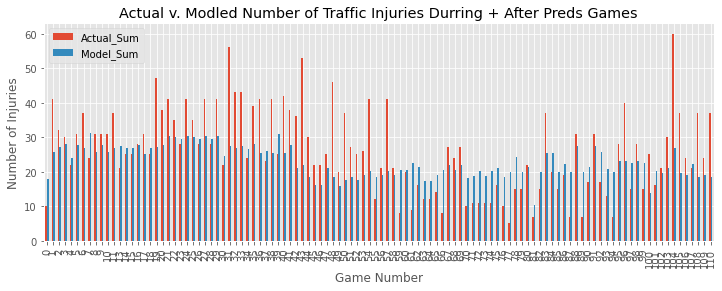

In [85]:
# Visualizes Preds Info
preds_info = get_info(preds, 2, 3)

print('Actual Number of Injuries:', round(preds_info['Actual_Sum'].sum()))
print('Modeled Number of Injuries:', round(preds_info['Model_Sum'].sum()))

preds_info[['Actual_Sum', 'Model_Sum']].plot(kind='bar', figsize=(12,4))

plt.xlabel('Game Number')
plt.ylabel('Number of Injuries')
plt.title('Actual v. Modled Number of Traffic Injuries Durring + After Preds Games')

Observations:
* It is possible that the model works too well... since the games are at regular times throughout the year, if there is a variation, it seems to have already been factored in...

Training Sample: 5853
Test Sample: 84
Actual Number of Injuries: 473
Modeled Number of Injuries: 654


Text(0.5, 1.0, 'Actual v. Modled Number of Traffic Injuries Durring + After Titans Games')

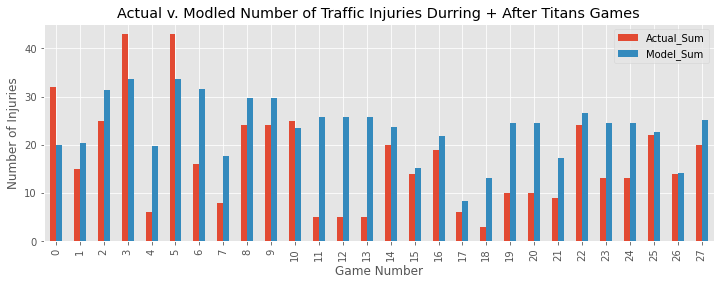

In [86]:
# Visualizes Titans Info
titans_info = get_info(titans, 3, 3)

print('Actual Number of Injuries:', round(titans_info['Actual_Sum'].sum()))
print('Modeled Number of Injuries:', round(titans_info['Model_Sum'].sum()))

titans_info[['Actual_Sum', 'Model_Sum']].plot(kind='bar', figsize=(12,4))

plt.xlabel('Game Number')
plt.ylabel('Number of Injuries')
plt.title('Actual v. Modled Number of Traffic Injuries Durring + After Titans Games')

Training Sample: 5832
Test Sample: 102
Actual Number of Injuries: 375
Modeled Number of Injuries: 412


Text(0.5, 1.0, 'Actual v. Modled Number of Traffic Injuries Durring + After Nash SC Games')

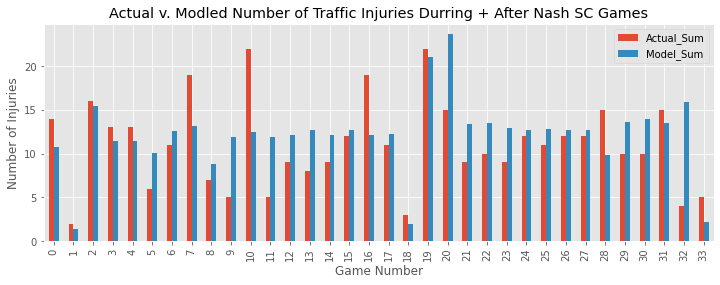

In [87]:
# Visualizes Nash SC Info
nash_sc_info = get_info(nash_sc, 2, 3)

print('Actual Number of Injuries:', round(nash_sc_info['Actual_Sum'].sum()))
print('Modeled Number of Injuries:', round(nash_sc_info['Model_Sum'].sum()))

nash_sc_info[['Actual_Sum', 'Model_Sum']].plot(kind='bar', figsize=(12,4))

plt.xlabel('Game Number')
plt.ylabel('Number of Injuries')
plt.title('Actual v. Modled Number of Traffic Injuries Durring + After Nash SC Games')

Training Sample: 5634
Test Sample: 300
Actual Number of Injuries: 1463
Modeled Number of Injuries: 1458


Text(0.5, 1.0, 'Actual v. Modled Number of Traffic Injuries at Random Times')

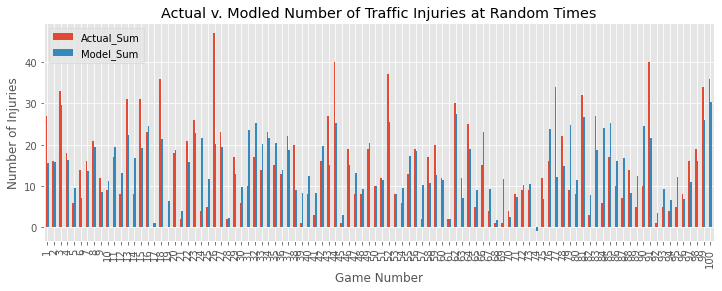

In [92]:
# Uses the same methode to project accidents at randome times to see if there is a pattern
import radar 

random = pd.DataFrame(columns=['Datetime'])

for i in range(100):
    dt = radar.random_datetime(start = datetime(year=2019, month=1, day=1),
                               stop = datetime(year=2021, month=12, day=31))
    random.loc[random.shape[0]+1,'Datetime'] = dt

random.head()

# Visualizes Random Info
random_info = get_info(random, 0, 3)

print('Actual Number of Injuries:', round(random_info['Actual_Sum'].sum()))
print('Modeled Number of Injuries:', round(random_info['Model_Sum'].sum()))

random_info[['Actual_Sum', 'Model_Sum']].plot(kind='bar', figsize=(12,4))

plt.xlabel('Game Number')
plt.ylabel('Number of Injuries')
plt.title('Actual v. Modled Number of Traffic Injuries at Random Times')


<AxesSubplot:xlabel='X_Val', ylabel='Diff'>

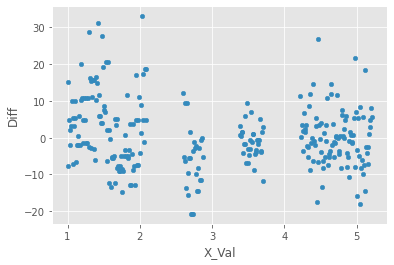

In [103]:
# Visualizes the distance above the model for each team
diff = pd.DataFrame(columns=['Team', 'Date', 'X_Val', 'Actual_Sum', 'Model_Sum', 'Diff'])

j = 1
for i in preds_info.index:
    team = 'Preds'
    date = preds_info.loc[i,'Datetime']
    x_val = j
    j = j+.01
    actual = preds_info.loc[i,'Actual_Sum']
    model = preds_info.loc[i,'Model_Sum']
    difference = actual - model

    diff.loc[diff.shape[0] + 1] = [team, date, x_val, actual, model, difference]

j = j+.5
for i in titans_info.index:
    team = 'Titans'
    date = titans_info.loc[i,'Datetime']
    x_val = j
    j = j+.01
    actual = titans_info.loc[i,'Actual_Sum']
    model = titans_info.loc[i,'Model_Sum']
    difference = actual - model

    diff.loc[diff.shape[0] + 1] = [team, date, x_val, actual, model, difference]

j = j+.5
for i in nash_sc_info.index:
    team = 'Nash SC'
    date = nash_sc_info.loc[i,'Datetime']
    x_val = j
    j = j+.01
    actual = nash_sc_info.loc[i,'Actual_Sum']
    model = nash_sc_info.loc[i,'Model_Sum']
    difference = actual - model

    diff.loc[diff.shape[0] + 1] = [team, date, x_val, actual, model, difference]

j = j+.5
for i in random_info.index:
    team = 'Random'
    date = random_info.loc[i,'Datetime']
    x_val = j
    j = j+.01
    actual = random_info.loc[i,'Actual_Sum']
    model = random_info.loc[i,'Model_Sum']
    difference = actual - model

    diff.loc[diff.shape[0] + 1] = [team, date, x_val, actual, model, difference]

diff.plot(kind='scatter', x='X_Val', y='Diff')

In [94]:
diff.to_csv('data/difference_data.csv')

In [111]:
data.to_csv('data/model_data.csv')

In [72]:
titans_info.head()

,Opponent,Datetime,Actual_0,Model_0,Actual_1,Model_1,Actual_2,Model_2,Actual_3,Model_3,Actual_4,Model_4,Actual_5,Model_5,Actual_Sum,Model_Sum
0,vs New England Patriots,2019-08-17 06:00:00,4.0,5.444360,1.0,7.342753,6.0,7.076961,5.0,6.116398,11.0,6.609456,16.0,7.564612,43.0,40.154540
1,vs Pittsburgh Steelers,2019-08-25 07:00:00,0.0,6.639079,3.0,6.373287,5.0,5.412724,3.0,5.905781,2.0,6.860938,10.0,8.016908,23.0,39.208718
2,vs Indianapolis Colts,2019-09-15 12:00:00,9.0,8.014386,5.0,8.185434,12.0,8.716111,10.0,10.002442,11.0,9.813782,4.0,11.791362,51.0,56.523518
3,vs Buffalo Bills,2019-10-06 12:00:00,7.0,8.774351,7.0,8.945399,4.0,9.476076,7.0,10.762406,16.0,10.573747,20.0,12.551326,61.0,61.083304
4,vs Los Angeles Chargers,2019-10-20 03:05:00,3.0,3.325624,3.0,3.034858,3.0,3.736879,4.0,5.498128,1.0,7.396522,1.0,7.130730,15.0,30.122740


In [100]:
print(preds_info['Actual_Sum'].sum() - preds_info['Model_Sum'].sum())
print(titans_info['Actual_Sum'].sum() - titans_info['Model_Sum'].sum())
print(nash_sc_info['Actual_Sum'].sum() - nash_sc_info['Model_Sum'].sum())
print(random_info['Actual_Sum'].sum() - random_info['Model_Sum'].sum())
print()
print(diff[diff['Team'] == 'Preds']['Diff'].mean())
print(diff[diff['Team'] == 'Titans']['Diff'].mean())
print(diff[diff['Team'] == 'Nash SC']['Diff'].mean())
print(diff[diff['Team'] == 'Random']['Diff'].mean())



348.8276295274127
-180.73036119760104
-36.894694952002
5.3757125771917345

3.1711602684310254
-6.45465575705718
-1.0851380868235876
0.05375712577191601


In [112]:
# Evaluates the model's accuracy
model = MLPRegressor(activation = 'identity', 
                     solver = 'sgd', 
                     alpha = 1, 
                     hidden_layer_sizes = 2, 
                     max_iter = 1000,
                     random_state = 42) 

scores = cross_val_score(model, x_data, y_data, cv=10, scoring='r2')

print(scores)
print(scores.mean())

[0.29134717 0.34045011 0.34997741 0.05526992 0.19207308 0.12932851
 0.07811396 0.08155288 0.22641318 0.31510054]
0.20596267680621252
